# **Imports**

In [ ]:
# Assigned by: Saar Ben-Yochana - ********* | Efi Korenfeld - *********
# Kaggle Team: Efi & Saar

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
import seaborn as sns
import statsmodels.api as sm
from sklearn.kernel_ridge import KernelRidge
from sklearn.preprocessing import  LabelEncoder,StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from scipy import stats
from sklearn.impute import KNNImputer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.pipeline import make_pipeline
color = sns.color_palette()
sns.set_style('darkgrid')

# **Import dataset**

In [97]:
drive.mount('/content/gdrive',force_remount=True)
train_path = '/content/gdrive/My Drive/Saar_king/train.csv' 
test_path = '/content/gdrive/My Drive/Saar_king/test.csv' 
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

Mounted at /content/gdrive


## **Analyzing the data:**

In [98]:
train.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2342.000000,2333.000000,2333.000000,2342.000000,2186.000000,2342.000000,1916.000000,2342.000000,2314.000000,2342.000000,2327.000000,2156.000000,2327.000000,2342.000000,1993.000000,1.827000e+03,2314.000000,2314.000000,2212.000000,2216.000000
mean,2007.532878,69.302443,163.607801,29.577711,4.650284,725.542876,81.172756,2288.827071,38.523207,40.975662,82.424581,5.905751,82.397078,1.717165,7419.142104,1.338459e+07,4.814045,4.840017,0.629646,12.009296
std,4.621651,9.514162,123.751231,110.595193,4.063965,1902.153265,24.647995,10702.614535,20.021458,149.769331,23.665432,2.452172,23.559671,5.177235,13996.783219,6.692178e+07,4.410231,4.489478,0.211156,3.379391
min,2000.000000,39.000000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2003.000000,63.500000,74.000000,0.000000,0.870000,4.685343,77.000000,0.000000,19.400000,0.000000,78.000000,4.280000,78.000000,0.100000,464.229758,1.978665e+05,1.600000,1.500000,0.495000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.835000,65.268121,92.000000,15.500000,43.900000,4.000000,93.000000,5.740000,93.000000,0.100000,1814.492297,1.428588e+06,3.300000,3.300000,0.682000,12.400000
75%,2012.000000,75.800000,225.000000,21.000000,7.807500,446.887709,96.000000,372.000000,56.300000,26.000000,97.000000,7.462500,97.000000,0.700000,6171.262444,7.365517e+06,7.175000,7.200000,0.782000,14.300000
max,2015.000000,89.000000,723.000000,1700.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2200.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.300000,28.300000,0.948000,20.700000


In [99]:
test.describe()

,ID,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,595.000000,595.000000,595.000000,595.000000,557.000000,595.000000,468.000000,595.000000,589.000000,595.000000,591.000000,555.000000,591.000000,595.000000,497.000000,4.590000e+02,589.000000,589.000000,559.000000,559.000000
mean,298.776471,2007.453782,169.457143,33.213445,4.424991,789.514100,79.952991,2938.368067,37.452292,46.278992,83.018613,6.068450,82.010152,1.843025,7739.867957,1.024091e+07,4.948557,4.997453,0.619263,11.927370
std,172.207099,4.584684,126.387889,143.332182,4.004268,2296.898067,26.747249,14085.626757,20.060070,197.120644,22.493871,2.668645,24.355069,4.672701,15329.762088,2.661573e+07,4.460719,4.585575,0.209887,3.278662
min,1.000000,2000.000000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,2.100000,0.000000,3.000000,0.740000,3.000000,0.100000,14.142268,3.600000e+01,0.100000,0.100000,0.000000,0.000000
25%,150.500000,2004.000000,74.000000,0.000000,0.920000,5.250309,77.000000,0.000000,19.100000,0.000000,79.000000,4.240000,78.500000,0.100000,458.465173,1.781845e+05,1.600000,1.600000,0.488000,10.100000
50%,299.000000,2007.000000,145.000000,3.000000,3.480000,64.605901,92.000000,21.000000,41.900000,4.000000,93.000000,5.760000,93.000000,0.100000,1577.457182,1.246842e+06,3.500000,3.600000,0.658000,12.300000
75%,447.500000,2012.000000,232.500000,23.500000,7.530000,419.874405,97.000000,341.500000,55.700000,31.500000,97.000000,7.565000,97.000000,1.200000,5593.822995,7.806178e+06,7.300000,7.400000,0.767000,14.100000
max,596.000000,2015.000000,686.000000,1800.000000,15.520000,19099.045060,99.000000,182485.000000,75.200000,2500.000000,99.000000,17.200000,99.000000,42.100000,115761.577000,2.551311e+08,27.700000,28.600000,0.942000,20.600000


**Renaming the data features names for convinience (deleting unneccessary spaces, all lower letters):**

In [100]:
def convert_cols(df):
  df.columns = df.columns.str.lower()
  df.columns = df.columns.str.replace(' ', '_')
  df.columns = df.columns.str.rstrip('_')

  df.rename(columns = {'_hiv/aids':'hiv/aids','_thinness__1-19_years':'thinness_1-19_years','_thinness_5-9_years':'thinness_5-9_years','_bmi':'bmi'}, inplace = True)
  return df

In [101]:
ID = test.pop("ID")
train = convert_cols(train)
test = convert_cols(test)

**Checking for missing values in target:**

In [102]:
display(train[train["life_expectancy"].isnull()])

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
610,Dominica,2013,Developing,NaN,NaN,0,0.01,11.419555,96.0,0,...,96.0,5.58,96.0,0.1,722.756650,NaN,2.7,2.6,0.721,12.7
1313,Marshall Islands,2013,Developing,NaN,NaN,0,0.01,871.878317,8.0,0,...,79.0,17.24,79.0,0.1,3617.752354,NaN,0.1,0.1,NaN,0.0
1369,Monaco,2013,Developing,NaN,NaN,0,0.01,0.000000,99.0,0,...,99.0,4.30,99.0,0.1,NaN,NaN,NaN,NaN,NaN,NaN
1442,Nauru,2013,Developing,NaN,NaN,0,0.01,15.606596,87.0,0,...,87.0,4.65,87.0,0.1,136.183210,NaN,0.1,0.1,NaN,9.6
1523,Niue,2013,Developing,NaN,NaN,0,0.01,0.000000,99.0,0,...,99.0,7.20,99.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN
1563,Palau,2013,Developing,NaN,NaN,0,NaN,344.690631,99.0,0,...,99.0,9.27,99.0,0.1,1932.122370,292.0,0.1,0.1,0.779,14.2
1739,Saint Kitts and Nevis,2013,Developing,NaN,NaN,0,8.54,0.000000,97.0,0,...,96.0,6.14,96.0,0.1,NaN,NaN,3.7,3.6,0.749,13.4
1777,San Marino,2013,Developing,NaN,NaN,0,0.01,0.000000,69.0,0,...,69.0,6.50,69.0,0.1,NaN,NaN,NaN,NaN,NaN,15.1
2173,Tuvalu,2013,Developing,NaN,NaN,0,0.01,78.281203,9.0,0,...,9.0,16.61,9.0,0.1,3542.135890,1819.0,0.2,0.1,NaN,0.0


In [103]:
missing_countries = list(train[train["life_expectancy"].isnull()]["country"])
for country in missing_countries:
  display(train[train["country"]==country])

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
610,Dominica,2013,Developing,NaN,NaN,0,0.01,11.419555,96.0,0,...,96.0,5.58,96.0,0.1,722.75665,NaN,2.7,2.6,0.721,12.7


,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
1313,Marshall Islands,2013,Developing,NaN,NaN,0,0.01,871.878317,8.0,0,...,79.0,17.24,79.0,0.1,3617.752354,NaN,0.1,0.1,NaN,0.0


,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
1369,Monaco,2013,Developing,NaN,NaN,0,0.01,0.0,99.0,0,...,99.0,4.3,99.0,0.1,NaN,NaN,NaN,NaN,NaN,NaN


,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
1442,Nauru,2013,Developing,NaN,NaN,0,0.01,15.606596,87.0,0,...,87.0,4.65,87.0,0.1,136.18321,NaN,0.1,0.1,NaN,9.6


,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
1523,Niue,2013,Developing,NaN,NaN,0,0.01,0.0,99.0,0,...,99.0,7.2,99.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN


,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
1563,Palau,2013,Developing,NaN,NaN,0,NaN,344.690631,99.0,0,...,99.0,9.27,99.0,0.1,1932.12237,292.0,0.1,0.1,0.779,14.2


,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
1739,Saint Kitts and Nevis,2013,Developing,NaN,NaN,0,8.54,0.0,97.0,0,...,96.0,6.14,96.0,0.1,NaN,NaN,3.7,3.6,0.749,13.4


,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
1777,San Marino,2013,Developing,NaN,NaN,0,0.01,0.0,69.0,0,...,69.0,6.5,69.0,0.1,NaN,NaN,NaN,NaN,NaN,15.1


,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
2173,Tuvalu,2013,Developing,NaN,NaN,0,0.01,78.281203,9.0,0,...,9.0,16.61,9.0,0.1,3542.13589,1819.0,0.2,0.1,NaN,0.0


**All the countries where the target feature is missing, appear only once in the data, and contain multiple missing features, so we decided to drop them**

In [104]:
# Remove NA life expectancy (9 rows)
train.dropna(subset = ["life_expectancy"],inplace = True)
train.reset_index(drop=True, inplace=True)

**Counting missing values, zero values and unreasonable values:**

In [105]:
def missing_zero_high_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        above_1000_val = (df.select_dtypes(include=np.number)>1000).astype(int).sum(axis=0)
        mz_table = pd.concat([zero_val, mis_val], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values'})
        mz_table['Total'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total'] = round(100 * mz_table['Total'] / len(df),2)
        mz_table['>1000'] = above_1000_val
        mz_table['Mean'] = round(df.mean(numeric_only=True),2)
        mz_table['Median'] = round(df.median(numeric_only=True),2)
        mz_table['Data Type'] = df.dtypes
        mz_table.replace(np.nan,"-",inplace=True)
        return mz_table.sort_values(by=["Total"])

missing_zero_high_values_table(train)

,Zero Values,Missing Values,Total,% Total,>1000,Mean,Median,Data Type
country,0,0,0,0.00,-,-,-,object
year,0,0,0,0.00,2333.0,2007.51,2008.0,int64
status,0,0,0,0.00,-,-,-,object
life_expectancy,0,0,0,0.00,0.0,69.3,72.1,float64
adult_mortality,0,0,0,0.00,0.0,163.61,144.0,float64
hiv/aids,0,0,0,0.00,0.0,1.72,0.1,float64
diphtheria,0,15,15,0.64,0.0,82.4,93.0,float64
polio,0,15,15,0.64,0.0,82.43,93.0,float64
thinness_5-9_years,0,26,26,1.11,0.0,4.85,3.3,float64
thinness_1-19_years,0,26,26,1.11,0.0,4.83,3.3,float64


In [106]:
missing_zero_high_values_table(test)

,Zero Values,Missing Values,Total,% Total,>1000,Mean,Median,Data Type
country,0,0,0,0.00,-,-,-,object
year,0,0,0,0.00,595.0,2007.45,2007.0,int64
status,0,0,0,0.00,-,-,-,object
adult_mortality,0,0,0,0.00,0.0,169.46,145.0,int64
hiv/aids,0,0,0,0.00,0.0,1.84,0.1,float64
diphtheria,0,4,4,0.67,0.0,82.01,93.0,float64
polio,0,4,4,0.67,0.0,83.02,93.0,float64
thinness_5-9_years,0,6,6,1.01,0.0,5.0,3.6,float64
thinness_1-19_years,0,6,6,1.01,0.0,4.95,3.5,float64
bmi,0,6,6,1.01,0.0,37.45,41.9,float64


The features: **under-five_deaths**, **infant_deaths** and **measles** are defined as count per 1000 people (by observing the definitions on WHO website).

We decided to replace all values greater than 1000 with the maximum possible (1000).

In [107]:
replace_columns = ["measles","infant_deaths","under-five_deaths"]
train.loc[:,replace_columns] = np.where(train.loc[:,replace_columns]>1000,1000,train.loc[:,replace_columns])
test.loc[:,replace_columns] = np.where(test.loc[:,replace_columns]>1000,1000,test.loc[:,replace_columns])


In [108]:
missing_zero_high_values_table(train)

,Zero Values,Missing Values,Total,% Total,>1000,Mean,Median,Data Type
country,0,0,0,0.00,-,-,-,object
year,0,0,0,0.00,2333.0,2007.51,2008.0,int64
status,0,0,0,0.00,-,-,-,object
life_expectancy,0,0,0,0.00,0.0,69.3,72.1,float64
adult_mortality,0,0,0,0.00,0.0,163.61,144.0,float64
hiv/aids,0,0,0,0.00,0.0,1.72,0.1,float64
diphtheria,0,15,15,0.64,0.0,82.4,93.0,float64
polio,0,15,15,0.64,0.0,82.43,93.0,float64
thinness_5-9_years,0,26,26,1.11,0.0,4.85,3.3,float64
thinness_1-19_years,0,26,26,1.11,0.0,4.83,3.3,float64


**Note: BMI- normal range is 18.5-30.**

**Values such as 87 or 2 are not reasonable, but they appear both in the train and test set, so we decided to keep them assuming the scale of this measurement may be different.**


**Checking Correlations:**

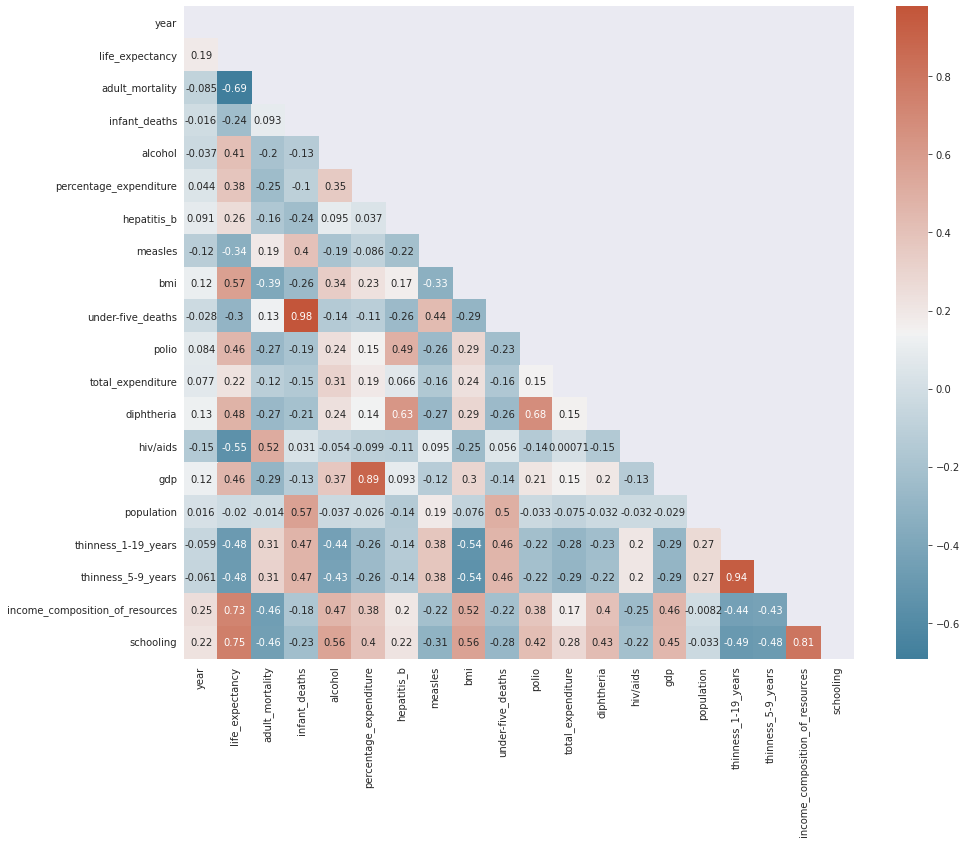

In [109]:
def correlations(df):
  corr=df.corr()
  f, ax = plt.subplots(figsize=(15, 12))
  mask = np.triu(np.ones_like(corr, dtype=bool))
  cmap = sns.diverging_palette(230, 20, as_cmap=True)
  sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)
correlations(train)

In [110]:
pd.DataFrame(train.corr()["life_expectancy"].sort_values(ascending=True))

,life_expectancy
adult_mortality,-0.691966
hiv/aids,-0.554819
thinness_1-19_years,-0.483770
thinness_5-9_years,-0.476864
measles,-0.335221
under-five_deaths,-0.295449
infant_deaths,-0.235007
population,-0.020347
year,0.185913
total_expenditure,0.223089


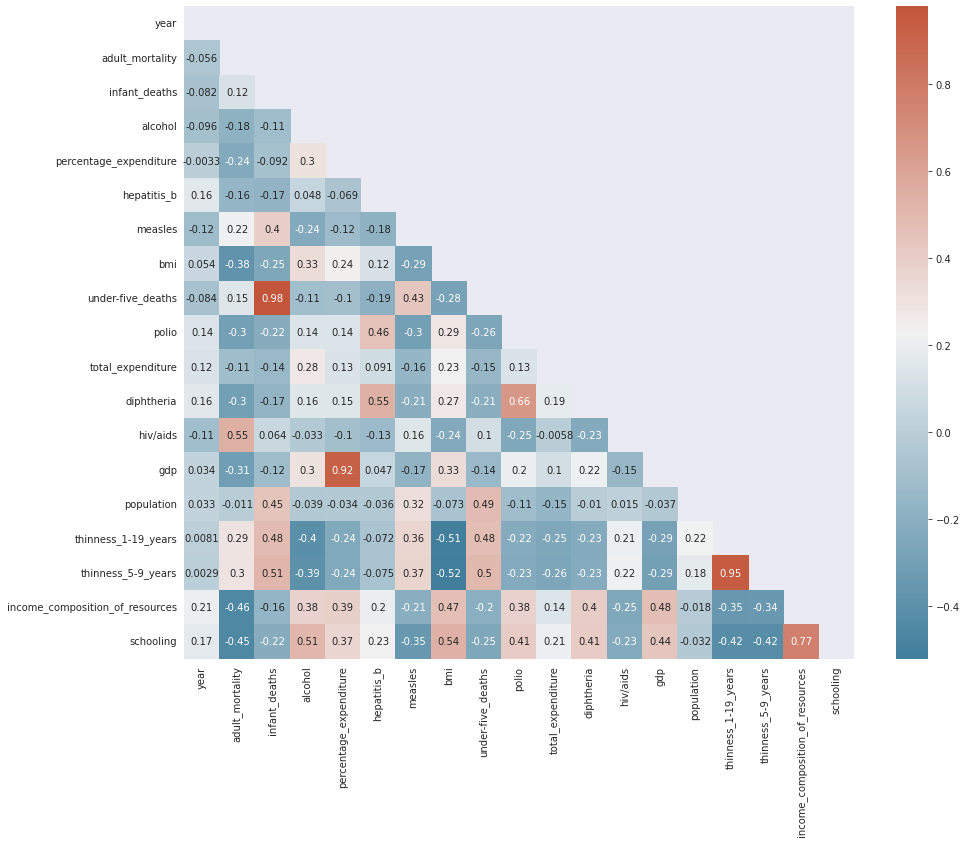

In [111]:
correlations(test)

In [112]:
cat_cols = ["country","status"]
cols = [x for x in train.columns if x not in cat_cols]

**Visualizing the distribution of the features vs target, based on status:**


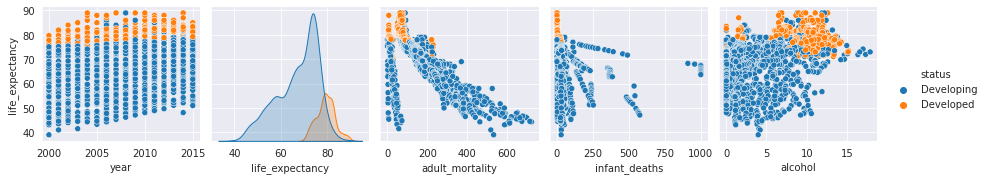

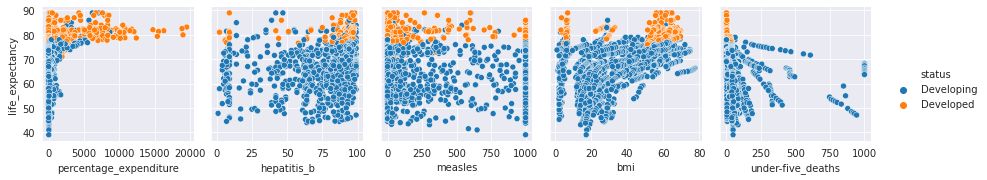

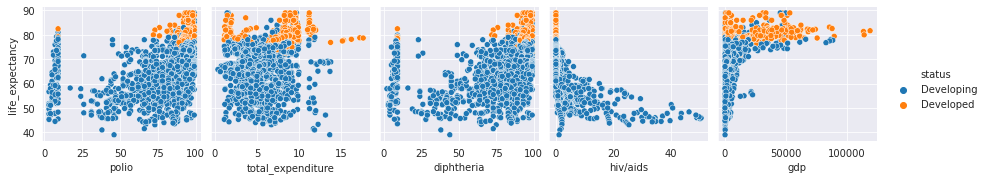

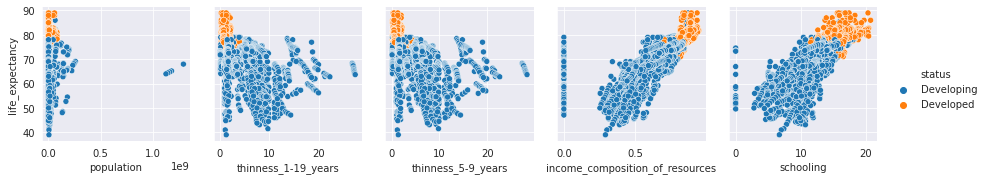

In [113]:
for i in range(0, len(cols), 5):
    sns.pairplot(data=train,
                x_vars = cols[i : i + 5],
                y_vars = ['life_expectancy'],
                hue = "status")

**The distributions of developed and developing countries are different, where developed countries have a higher average of life expectancy for each feature**

Visualizing distribution of each feature:

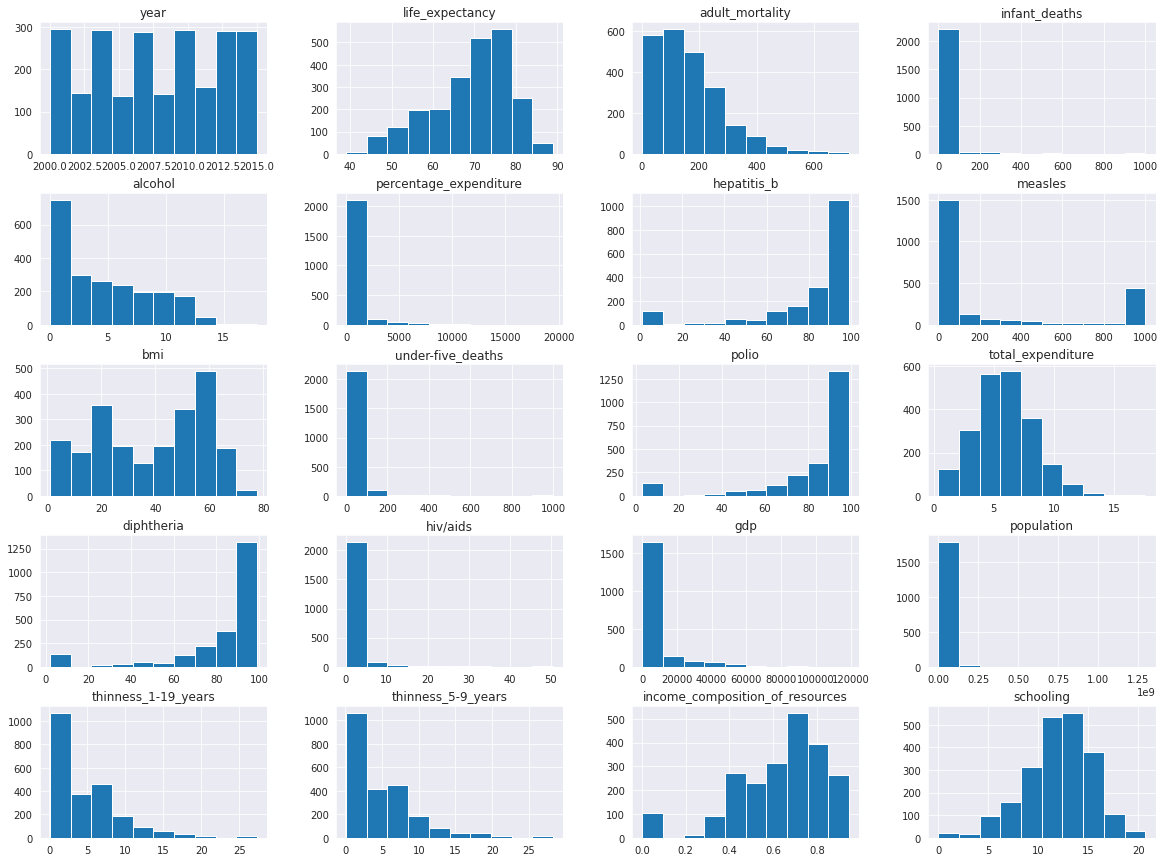

In [114]:
train.hist(figsize=(20,15))
plt.show()

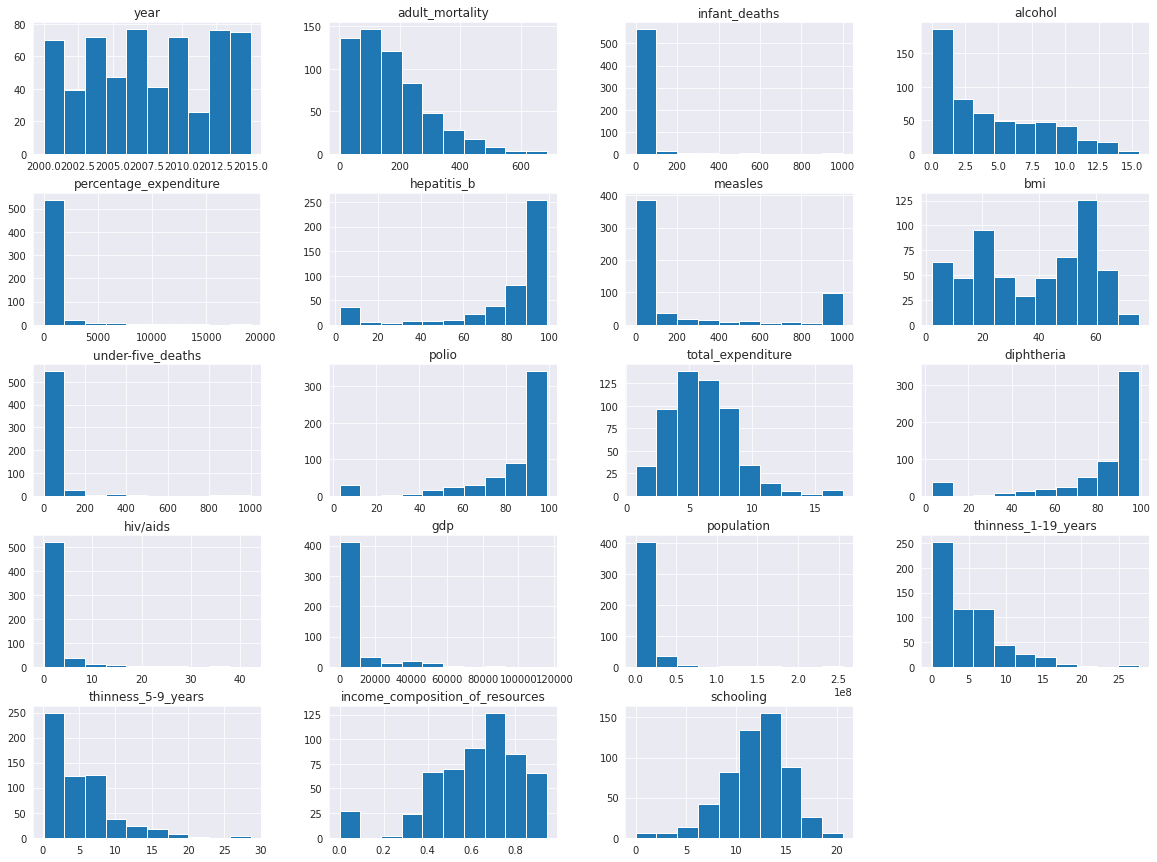

In [115]:
test.hist(figsize=(20,15))
plt.show()

**After looking at correlations, distributions and the data itself, we assume the train and test have the same distribution for all features (Moreover- they complete each other- we saw that countries that miss a row- the row appears in the test set). Since we need to impute the data to handle the missing values, we will merge them together during preprocessing, and later split them when we train the model.**

In [116]:
numeric_cols = [x for x in cols if x not in ["life_expectancy","year"]]
y_train  = train.pop("life_expectancy")
train["type"] = 1 # 1 for train
test["type"] = -1 # -1 for test
df = pd.concat([train,test],ignore_index=True)

In [117]:
df.shape

(2928, 22)

In [118]:
df.head(10)

,country,year,status,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,...,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_1-19_years,thinness_5-9_years,income_composition_of_resources,schooling,type
0,Afghanistan,2015,Developing,263.0,62,0.01,71.279624,65.0,1000,19.1,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,1
1,Afghanistan,2013,Developing,268.0,66,0.01,73.219243,64.0,430,18.1,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,1
2,Afghanistan,2012,Developing,272.0,69,0.01,78.184215,67.0,1000,17.6,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,1
3,Afghanistan,2011,Developing,275.0,71,0.01,7.097109,68.0,1000,17.2,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,1
4,Afghanistan,2010,Developing,279.0,74,0.01,79.679367,66.0,1000,16.7,...,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2,1
5,Afghanistan,2009,Developing,281.0,77,0.01,56.762217,63.0,1000,16.2,...,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9,1
6,Afghanistan,2008,Developing,287.0,80,0.03,25.873925,64.0,1000,15.7,...,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7,1
7,Afghanistan,2007,Developing,295.0,82,0.02,10.910156,63.0,1000,15.2,...,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4,1
8,Afghanistan,2006,Developing,295.0,84,0.03,17.171518,64.0,1000,14.7,...,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1,1
9,Afghanistan,2005,Developing,291.0,85,0.02,1.388648,66.0,1000,14.2,...,8.70,58.0,0.1,25.294130,257798.0,19.3,19.5,0.396,7.9,1


In [119]:
df.tail(10)

,country,year,status,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,...,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_1-19_years,thinness_5-9_years,income_composition_of_resources,schooling,type
2918,Yemen,2005,Developing,245.0,40,0.04,0.000000,8.0,1000,33.9,...,4.58,79.0,0.1,NaN,NaN,13.9,13.8,0.470,8.6,-1
2919,Zambia,2015,Developing,33.0,27,NaN,0.000000,9.0,9,23.4,...,NaN,9.0,4.1,1313.889646,161587.0,6.3,6.1,0.576,12.5,-1
2920,Zambia,2010,Developing,363.0,30,2.47,184.364910,83.0,1000,2.7,...,4.41,83.0,6.8,1463.213573,138533.0,6.7,6.5,0.533,11.8,-1
2921,Zambia,2009,Developing,368.0,30,2.30,143.869887,94.0,26,2.2,...,4.73,94.0,9.1,1139.112330,13456417.0,6.7,6.6,0.518,11.6,-1
2922,Zambia,2005,Developing,554.0,34,2.33,121.879331,82.0,45,18.4,...,7.56,82.0,17.0,691.317816,1252156.0,7.1,7.0,0.467,10.7,-1
2923,Zimbabwe,2014,Developing,371.0,23,6.50,10.822595,91.0,0,31.3,...,6.44,91.0,6.3,127.474620,15411675.0,5.9,5.7,0.498,10.3,-1
2924,Zimbabwe,2013,Developing,399.0,25,6.39,10.666707,95.0,0,3.8,...,6.88,95.0,6.8,111.227396,155456.0,6.2,6.0,0.488,10.4,-1
2925,Zimbabwe,2010,Developing,527.0,29,5.21,53.308581,9.0,1000,29.4,...,5.37,89.0,15.7,713.635620,1486317.0,7.1,7.0,0.436,10.0,-1
2926,Zimbabwe,2008,Developing,632.0,30,3.56,20.843429,75.0,0,28.6,...,4.96,75.0,20.5,325.678573,13558469.0,7.8,7.8,0.421,9.7,-1
2927,Zimbabwe,2001,Developing,686.0,25,1.72,0.000000,76.0,529,25.9,...,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,-1


In [120]:
df.describe()

,year,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_1-19_years,thinness_5-9_years,income_composition_of_resources,schooling,type
count,2928.00000,2928.000000,2928.000000,2735.000000,2928.000000,2375.000000,2928.000000,2896.000000,2928.000000,2909.000000,2702.000000,2909.000000,2928.000000,2485.000000,2.284000e+03,2896.000000,2896.000000,2768.000000,2768.000000,2928.000000
mean,2007.50000,164.796448,28.358265,4.614856,740.321185,80.960842,252.629781,38.235394,37.739413,82.548298,5.930163,82.321416,1.747712,7494.210719,1.276454e+07,4.850622,4.881423,0.627419,11.999639,0.593579
std,4.61056,124.292079,93.643625,4.050749,1990.930605,25.018337,388.387086,19.959590,112.777373,23.416674,2.483273,23.706644,5.085542,14282.251492,6.103765e+07,4.420829,4.509609,0.210978,3.346440,0.804913
min,2000.00000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000,-1.000000
25%,2003.75000,74.000000,0.000000,0.905000,4.853964,77.000000,0.000000,19.300000,0.000000,78.000000,4.260000,78.000000,0.100000,463.852618,1.966738e+05,1.600000,1.575000,0.493000,10.100000,1.000000
50%,2007.50000,144.000000,3.000000,3.770000,65.611455,92.000000,17.000000,43.350000,4.000000,93.000000,5.750000,93.000000,0.100000,1764.973870,1.391756e+06,3.300000,3.400000,0.677000,12.300000,1.000000
75%,2011.25000,228.000000,22.000000,7.715000,442.614322,97.000000,362.250000,56.100000,28.000000,97.000000,7.490000,97.000000,0.800000,5932.899677,7.426746e+06,7.200000,7.200000,0.779250,14.300000,1.000000
max,2015.00000,723.000000,1000.000000,17.870000,19479.911610,99.000000,1000.000000,77.600000,1000.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000,1.000000


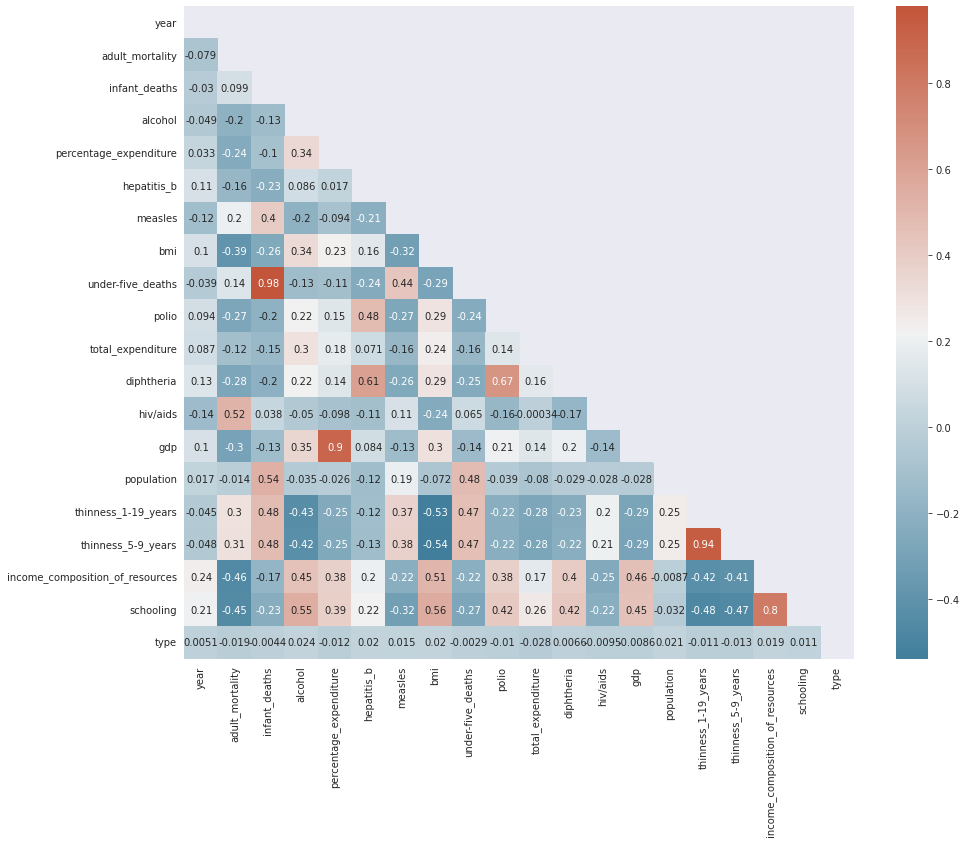

In [121]:
correlations(df)

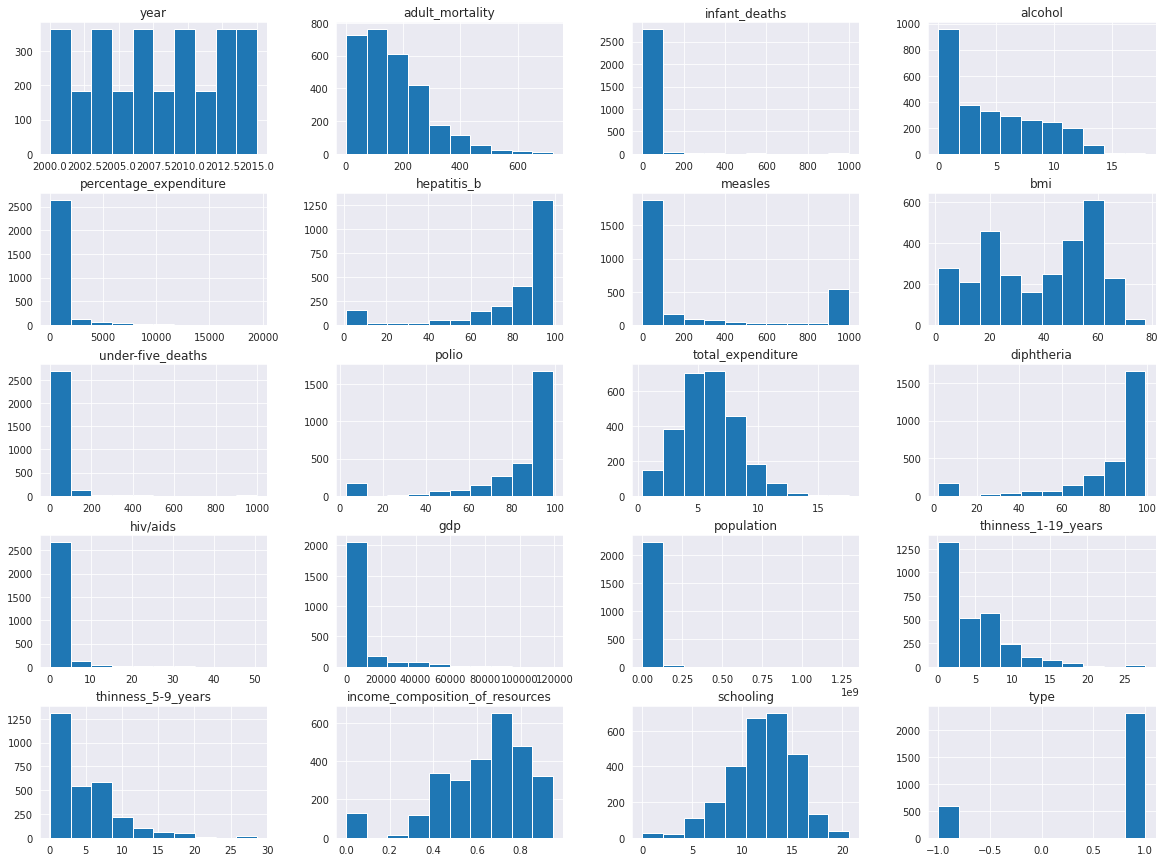

In [122]:
df.hist(figsize=(20,15))
plt.show()

**After merging the data,  the correlations and distribution appear to not change, so we continue processing the merged data**

In [123]:
missing_zero_high_values_table(df)

,Zero Values,Missing Values,Total,% Total,>1000,Mean,Median,Data Type
country,0,0,0,0.00,-,-,-,object
hiv/aids,0,0,0,0.00,0.0,1.75,0.1,float64
adult_mortality,0,0,0,0.00,0.0,164.8,144.0,float64
type,0,0,0,0.00,0.0,0.59,1.0,int64
status,0,0,0,0.00,-,-,-,object
year,0,0,0,0.00,2928.0,2007.5,2007.5,int64
polio,0,19,19,0.65,0.0,82.55,93.0,float64
diphtheria,0,19,19,0.65,0.0,82.32,93.0,float64
bmi,0,32,32,1.09,0.0,38.24,43.35,float64
thinness_1-19_years,0,32,32,1.09,0.0,4.85,3.3,float64


**Handling missing values:**

*   **We decided to fill the missing values since they are a great share of the data.**
*   **We would like to interpolate the missing values by country and year since we saw year has correlation different than zero with other features.**





In [124]:
countries = list(set(list(df['country'])))

Before interpolating, we noticed a significant amount of the data contains measurement errors, most of them are too small measurements (including zeros)

For example:

In [125]:
col = ["polio"]
df_mont = df[(df['country'] =="Montenegro")].sort_values(by=["year"])
df_mont.loc[:,col]

,polio
2684,NaN
1391,NaN
1390,NaN
1389,NaN
1388,NaN
2683,NaN
1387,9.0
1386,92.0
1385,95.0
2682,91.0


Line 1387 is probably a typo, and interpolating will result this error to spread. In order to avoid it, we compute the medians of all features, grouped by status- developed/developing, and we will replace the error measurements with this median according to the status of the country before interpolating.

In [126]:
medians = {"Developed":{},"Developing":{}}
means = {"Developed":{},"Developing":{}}
for item in df.groupby(["status"]):
  for col in numeric_cols:
      medians[item[0]][col] = item[1][col].median()
      means[item[0]][col] = item[1][col].mean()

print(medians)
print("- - - ")
print(means)

{'Developed': {'adult_mortality': 73.0, 'infant_deaths': 0.0, 'alcohol': 10.32, 'percentage_expenditure': 846.6156435, 'hepatitis_b': 95.0, 'measles': 12.0, 'bmi': 57.45, 'under-five_deaths': 0.0, 'polio': 96.0, 'total_expenditure': 7.895, 'diphtheria': 96.0, 'hiv/aids': 0.1, 'gdp': 13560.72386, 'population': 1167660.0, 'thinness_1-19_years': 1.1, 'thinness_5-9_years': 1.0, 'income_composition_of_resources': 0.862, 'schooling': 15.8}, 'Developing': {'adult_mortality': 163.0, 'infant_deaths': 6.0, 'alcohol': 2.58, 'percentage_expenditure': 48.90007122, 'hepatitis_b': 91.0, 'measles': 18.5, 'bmi': 35.150000000000006, 'under-five_deaths': 7.0, 'polio': 91.0, 'total_expenditure': 5.4, 'diphtheria': 91.0, 'hiv/aids': 0.1, 'gdp': 1244.429421, 'population': 1412966.5, 'thinness_1-19_years': 4.65, 'thinness_5-9_years': 4.6, 'income_composition_of_resources': 0.631, 'schooling': 11.7}}
- - - 
{'Developed': {'adult_mortality': 79.685546875, 'infant_deaths': 1.494140625, 'alcohol': 9.826735537190

**To handle the measurement errors shown above, for each feature we replace values that are lower than 10% of the median of the status group with the median:**

In [127]:
dfs =[] 
for status in ["Developed","Developing"]:
  df_temp = df[df["status"]==status].copy()
  for col in numeric_cols:
      q = df_temp[col].quantile(0.5)
      l = 0.1*q
      print(col , len(df_temp[df_temp[col] < l]))
      df_temp.loc[:,col] = np.where(df_temp[col]<l,medians[status][col],df_temp[col])

  dfs.append(df_temp)
  
df = pd.concat(dfs)

adult_mortality 25
infant_deaths 0
alcohol 7
percentage_expenditure 125
hepatitis_b 17
measles 162
bmi 7
under-five_deaths 0
polio 7
total_expenditure 0
diphtheria 10
hiv/aids 0
gdp 43
population 76
thinness_1-19_years 0
thinness_5-9_years 0
income_composition_of_resources 0
schooling 0
adult_mortality 174
infant_deaths 517
alcohol 437
percentage_expenditure 639
hepatitis_b 140
measles 915
bmi 90
under-five_deaths 477
polio 164
total_expenditure 1
diphtheria 159
hiv/aids 0
gdp 192
population 407
thinness_1-19_years 64
thinness_5-9_years 74
income_composition_of_resources 130
schooling 26


**Looking again at the polio feature in Montenegro, we see the error measurement was replaces with a valid value:**

**Line 1387: 9 was replaced 91**

In [128]:
col = ["polio"]
df_mont = df[(df['country'] =="Montenegro")].sort_values(by=["year"])
df_mont.loc[:,col]

,polio
2684,NaN
1391,NaN
1390,NaN
1389,NaN
1388,NaN
2683,NaN
1387,91.0
1386,92.0
1385,95.0
2682,91.0


**Now we can confidently interpolate the missing values in each feature by country, sorted by year.**

**Note we used the limit_direction="both", in order to fill the first and last values if they are missing**

In [129]:
dfs =[]
for country in countries:
  df_c = df[(df['country'] ==country)].sort_values(by=["year"])
  for col in numeric_cols:
    df_c.loc[:,col] = df_c.loc[:,col].interpolate(limit_direction="both")
  dfs.append(df_c)
df  = pd.concat(dfs)

**Observing our example we see the interpolation was successful**


In [130]:
col = ["polio"]
df_mont = df[(df['country'] =="Montenegro")].sort_values(by=["year"])
df_mont.loc[:,col]

,polio
2684,91.0
1391,91.0
1390,91.0
1389,91.0
1388,91.0
2683,91.0
1387,91.0
1386,92.0
1385,95.0
2682,91.0


**Note that all missing values remaining, are for countries where the whole feature data is missing**

In [131]:
missing_zero_high_values_table(df)

,Zero Values,Missing Values,Total,% Total,>1000,Mean,Median,Data Type
country,0,0,0,0.00,-,-,-,object
hiv/aids,0,0,0,0.00,0.0,1.75,0.1,float64
diphtheria,0,0,0,0.00,0.0,87.08,93.0,float64
polio,0,0,0,0.00,0.0,87.36,93.0,float64
measles,0,0,0,0.00,0.0,259.04,18.5,float64
percentage_expenditure,0,0,0,0.00,413.0,786.65,91.2,float64
type,0,0,0,0.00,0.0,0.59,1.0,int64
adult_mortality,0,0,0,0.00,0.0,174.4,159.0,float64
status,0,0,0,0.00,-,-,-,object
year,0,0,0,0.00,2928.0,2007.5,2007.5,int64


**Since population and gdp have a massive amount of missing values, we decided to drop them**

In [132]:
to_drop = ["population","gdp"]
df.drop(columns=to_drop,inplace=True)
numeric_cols = list(set(numeric_cols) - set(to_drop))


**Observing the skewness of features we see that some of them are very skewed**

In [133]:
abs(df.skew(axis = 0, numeric_only=True)).sort_values()

year                               0.000000
bmi                                0.228074
schooling                          0.287945
income_composition_of_resources    0.345260
total_expenditure                  0.589546
alcohol                            0.733634
measles                            1.237974
adult_mortality                    1.294901
type                               1.475899
thinness_1-19_years                1.736771
hepatitis_b                        1.755153
polio                              1.800568
thinness_5-9_years                 1.808592
diphtheria                         1.972836
percentage_expenditure             4.648384
hiv/aids                           5.386623
under-five_deaths                  6.200016
infant_deaths                      7.444253
dtype: float64

**Since the data is skewed and still contains unreasonable values such as the bmi and classification errors in the status, we decided to fill the missing values each by the closest neighbor rows, using the KNNimputer**

In [134]:
imputer = KNNImputer(n_neighbors=2)
df[numeric_cols] =  imputer.fit_transform(df[numeric_cols])
print(df.isnull().sum())

country                            0
year                               0
status                             0
adult_mortality                    0
infant_deaths                      0
alcohol                            0
percentage_expenditure             0
hepatitis_b                        0
measles                            0
bmi                                0
under-five_deaths                  0
polio                              0
total_expenditure                  0
diphtheria                         0
hiv/aids                           0
thinness_1-19_years                0
thinness_5-9_years                 0
income_composition_of_resources    0
schooling                          0
type                               0
dtype: int64


**Now that the data doesnt contain any missing values, we continue to feature selection:**

**First we calculate the variance inflation factor for each feature, the thumb rule is that vif>4 implies there are features with high correlation with each other.**

In [135]:
# compute the vif for all given features
def compute_vif(considered_features):
    X = df.loc[:,considered_features]
    # the calculation of variance inflation requires a constant
    X.loc[:,'intercept'] = 1
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif.loc[:,"Variable"] = X.columns
    vif.loc[:,"VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

compute_vif(numeric_cols).sort_values(by='VIF')


,Variable,VIF
15,total_expenditure,1.198786
1,percentage_expenditure,1.341191
13,measles,1.388364
5,hiv/aids,1.483533
4,hepatitis_b,1.619581
9,alcohol,1.768555
10,bmi,1.788426
6,adult_mortality,1.905120
0,polio,4.775738
11,diphtheria,5.005989


**We see that some features have vif>4, to decide which features to remove we check the correlations:**

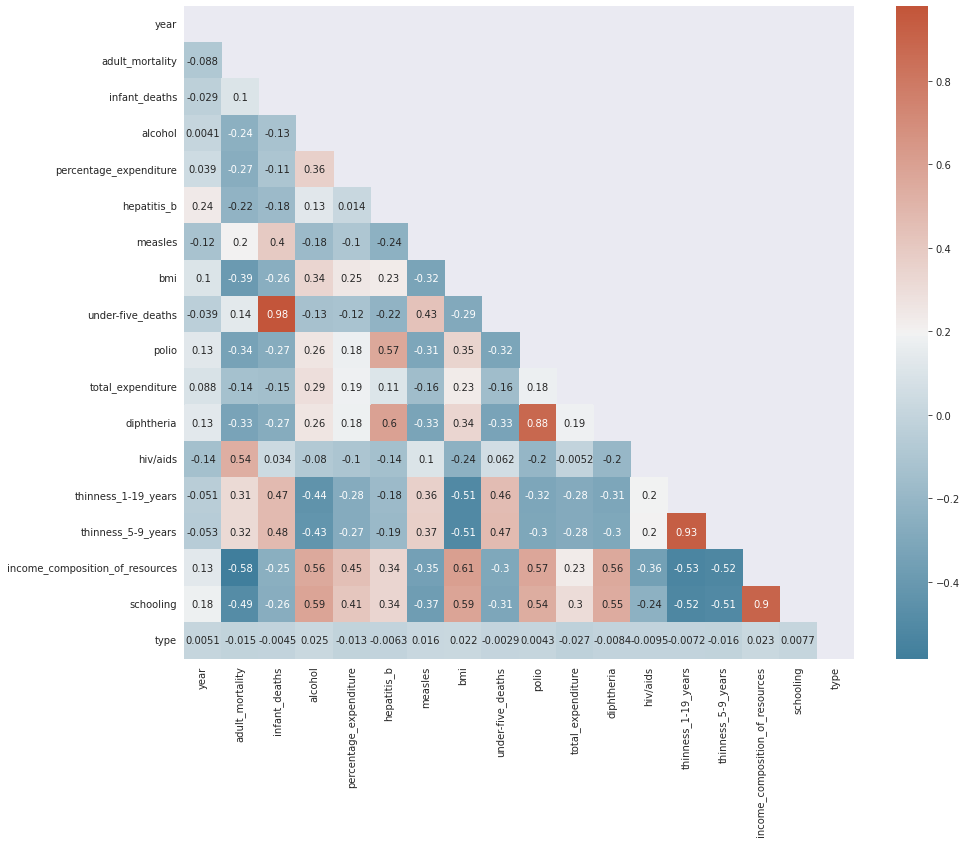

In [136]:
correlations(df)

 

*   **"under-five_deaths" and "infant_death" both have high vif and high correlation with each other. Therefore we drop the one with the higher vif, which is: "under-five_deaths"**
*   **For "thinness_1-19_years" vs "thinness_5-9_years", dropped: "thinness_1-19_years"**

*   **For "income_composition_of_resources" vs "schooling" dropped: "income_composition_of_resources"**
*   **For "diphtheria" vs "polio" dropped: "diphtheria"**




In [137]:
drop_cols = ['thinness_1-19_years','income_composition_of_resources',"under-five_deaths",'diphtheria']
numeric_cols = list(set(numeric_cols) - set(drop_cols))
df.drop(columns=drop_cols,inplace=True)



**Verifying that all vif values are below the threshold:**

In [138]:
compute_vif(numeric_cols).sort_values(by='VIF')

,Variable,VIF
8,total_expenditure,1.160288
4,percentage_expenditure,1.285900
6,measles,1.356768
10,hiv/aids,1.441495
0,infant_deaths,1.452552
9,hepatitis_b,1.519067
2,alcohol,1.699827
1,bmi,1.721765
11,adult_mortality,1.791954
3,polio,1.913296


**Encoding "year" feature using label encoder and the categorial features: "status" and "country" using one-hot encoder**

In [139]:
le = LabelEncoder()
df["year"] = df[["year"]].apply(lambda col: le.fit_transform(col))
df = pd.get_dummies(df, drop_first=True)
display(df)

,year,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,polio,total_expenditure,...,country_United States of America,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Venezuela (Bolivarian Republic of),country_Viet Nam,country_Yemen,country_Zambia,country_Zimbabwe,status_Developing
782,0,33.0,3.0,2.18,48.900071,91.0,336.0,18.00,84.0,3.61,...,0,0,0,0,0,0,0,0,0,1
781,1,163.0,3.0,2.25,48.900071,91.0,99.0,18.50,85.0,3.71,...,0,0,0,0,0,0,0,0,0,1
780,2,298.0,3.0,2.08,48.900071,92.0,32.0,19.10,86.0,3.75,...,0,0,0,0,0,0,0,0,0,1
779,3,297.0,3.0,2.47,48.900071,94.0,119.0,19.70,87.0,4.22,...,0,0,0,0,0,0,0,0,0,1
778,4,296.0,3.0,2.51,48.900071,95.0,18.5,35.15,88.0,4.35,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1184,11,266.0,9.0,3.72,60.446582,77.0,279.0,25.00,77.0,11.23,...,0,0,0,0,0,0,0,0,0,1
1183,12,261.0,9.0,2.58,48.098915,91.0,43.0,25.60,91.0,1.19,...,0,0,0,0,0,0,0,0,0,1
1182,13,258.0,9.0,2.58,45.048925,76.0,18.5,26.10,75.0,9.25,...,0,0,0,0,0,0,0,0,0,1
2640,14,329.0,8.0,2.58,54.373970,91.0,34.0,26.70,49.0,1.40,...,0,0,0,0,0,0,0,0,0,1


**Splitting the data to the original train and test sets:**

In [140]:
X_train = df[df["type"]==1].sort_index()
X_test = df[df["type"]==-1].sort_index()
X_train.pop("type")
X_test.pop("type")

print(X_train.shape)
print(X_test.shape)

(2333, 196)
(595, 196)


# Basic Model - Linear Regression

**Applying linear regression on the train set:**

In [141]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
print("score regressor: ",linear_regressor.score(X_train,y_train))

score regressor:  0.9673520327592923


In [142]:
y_train_pred = linear_regressor.predict(X_train)

**Validating the Linear Regression assumptions:**


*  **Mean of residuals**- should be close to zero.
*  **Homoscedasticity**- the residuals should have equal or almost equal variance across the regression line. 
*  **Normality of residuals**- should distribute normally.
*  **Autocorrelation of residuals**- should be non-significant.







**1. Mean of residuals:**

In [143]:
residuals = y_train.values-y_train_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals 1.7899277344961264e-08


The mean is indeed close to 0.

**Assumption 1 holds.**

**2. Homoscedasticity:**

First we visualize the residuals:

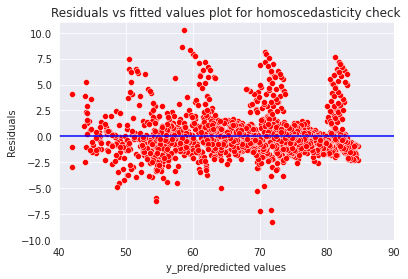

In [144]:
p = sns.scatterplot(x=y_train_pred,y=residuals,color='red')
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-10,11)
plt.xlim(40,90)
p = sns.lineplot(x=[40,90],y=[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

Checking heteroscedasticity : Using Goldfeld Quandt test for heteroscedasticity with significance (alpha) value of 0.05.

Null Hypothesis: Error terms are homoscedastic

Alternative Hypothesis: Error terms are heteroscedastic.

In [145]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
testGQ = sms.het_goldfeldquandt(residuals, X_train)
lzip(name, testGQ)

[('F statistic', 1.4342001143046996), ('p-value', 2.328818939077946e-09)]

Since p value is less than 0.05 in Goldfeld Quandt Test, we reject the null hypothesis meaning that the error terms are not homoscedastic.

**Assumption 2 does not hold.** 

**3. Normality of residuals:**

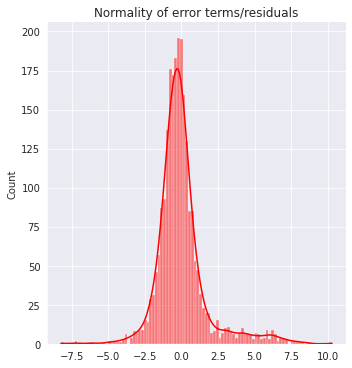

In [146]:
p = sns.displot(residuals,kde=True, color='red')
p = plt.title('Normality of error terms/residuals')

The residual terms are pretty much normally distributed for the number of test points we took. This is due to central limit theorem.

**Assumption 3 holds.**

**4. Autocorrelation of residuals:**

There should not be auto-correlation in the data so the error terms should not form any pattern:

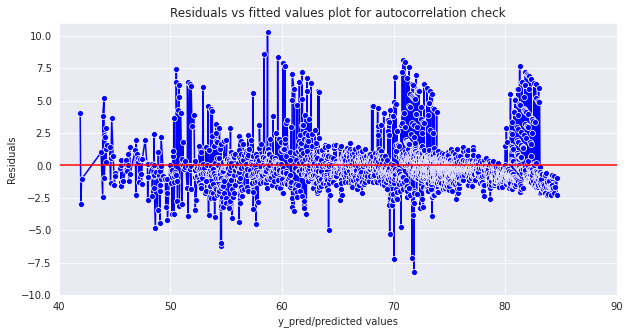

In [147]:
plt.figure(figsize=(10,5))
p = sns.lineplot(x=y_train_pred,y=residuals,marker='o',color='blue')
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-10,11)
plt.xlim(40,90)
p = sns.lineplot(x=[40,90],y=[0,0],color='red')
p = plt.title('Residuals vs fitted values plot for autocorrelation check')

To ensure the absence of autocorrelation we use Ljungbox test with significance (alpha) value of 0.05.

Null Hypothesis: Autocorrelation is absent.

Alternative Hypothesis: Autocorrelation is present.

In [148]:
from statsmodels.stats import diagnostic as diag
min(diag.acorr_ljungbox(residuals , lags = 40,return_df =False)[1])

6.9067510477617954e-133

Since p value is less than 0.05 we reject the null hypothesis that error terms are not autocorrelated.


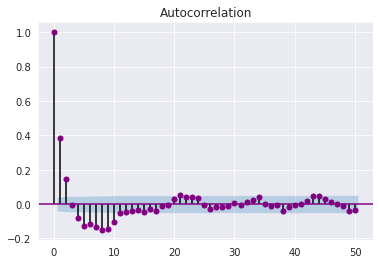

In [149]:
import statsmodels.api as sm# autocorrelation
sm.graphics.tsa.plot_acf(residuals, lags=50,color='purple')
plt.show()

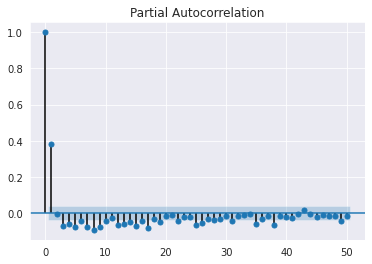

In [150]:
# partial autocorrelation
sm.graphics.tsa.plot_pacf(residuals, lags=50)
plt.show()

The results show signs of autocorelation since there are spikes outside the blue confidence interval region.


**Assumption 4 does not hold.**

# Other Models


Since that not all of the assumptions for Linear Regression hold, we tried using other models to optimize the results.

 Eventually we gained the best results using Kernel-Ridge Regression:

**Lasso**

In [151]:
reg = make_pipeline(StandardScaler(),Lasso(alpha=0.001))
reg.fit(X_train, y_train)
print("score regressor: ",reg.score(X_train,y_train))

score regressor:  0.9672037104326425


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.651e+02, tolerance: 2.111e+01
  model = cd_fast.enet_coordinate_descent(


**Ridge**

In [152]:
reg = make_pipeline(StandardScaler(),Ridge(alpha=0.01))
reg.fit(X_train, y_train)
print("score regressor: ",reg.score(X_train,y_train))

score regressor:  0.9673520294521117


**kernel regression**

In [153]:
reg = make_pipeline(StandardScaler(),KernelRidge(kernel="polynomial",degree=2,alpha=0.04,coef0=0.8))
reg.fit(X_train, y_train)
print("score regressor: ",reg.score(X_train,y_train))

score regressor:  0.984629312352697


**Best result was achieved using the following model:**



In [154]:
reg = make_pipeline(StandardScaler(),PolynomialFeatures(2),KernelRidge(kernel="laplacian",alpha=0.005))
reg.fit(X_train, y_train)
print("score regressor: ",reg.score(X_train,y_train))
y_pred = reg.predict(X_test)

score regressor:  0.9921556306459366


In [155]:
import csv 
    
# field names 
fields = ['ID', 'Life Expectancy'] 
rows = list(zip(ID, y_pred))

filename = "predictions.csv"

# writing to csv file 
with open(filename, 'w') as csvfile: 
    # creating a csv writer object 
    csvwriter = csv.writer(csvfile) 
        
    # writing the fields 
    csvwriter.writerow(fields) 
        
    # writing the data rows 
    csvwriter.writerows(rows)
